<a href="https://colab.research.google.com/github/ehsung/PUBH6886/blob/main/PUBH6886_Homework_2_EHS_COMPLETED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUBH 6886 Homework 2
## Completed by Edward Sung
## Completed on 10/08/24

Note: suppressWarnings() is used on train() since it generates a lot of warnings related to:

Warning message:
“Setting row names on a tibble is deprecated.”

# Table of Contents

>[Question 1 -- reg_data.csv](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=ZHnVPFtK8o4u)

>>[(a)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=pfSf7x_r8wl6)

>>[(b)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=hxX_AJVoACbB)

>>[(c)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=MNdRQSq-Ap_s)

>>[(d)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=DSSCtjokDtZx)

>[Question 2 - mus14data.csv](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=uJvzd2EQGAKS)

>>[Part I (Validation Set Approach)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=1OFhiC1lHWNc)

>>>[(a)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=MeyMZsIuHY0q)

>>>[(b)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=s4_8iv_zmvQ9)

>>>[(c)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=0yNo8F55noPV)

>>>[(d)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=EFSmWE3oKXdY)

>>[Part II (Cross-Validation Approach)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=_GZDGS2LHqEk)

>>>[(e)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=zwA7N23THwTM)

>>>[(f)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=u4-hERaDjGbs)

>>>[(g)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=daDFX3fS64JW)

>>>[(h)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=UcpvcWVRMBup)

>>>[(i)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=1BJMoeMnWV3S)

>>>[(j)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=estEZ2hScgeA)



In [ ]:
# Install Libraries
install.packages("caret")
install.packages("ggplot2")
install.packages("pROC")
install.packages("naivebayes")
install.packages("psych")

In [40]:
# Load libraries
library(dplyr)
library(caret)
library(ggplot2)
library(pROC)
library(naivebayes)
library(psych)
library(readr)
library(class)
library(MASS)

# Question 1 -- reg_data.csv
(40 pts.) The csv file reg_data.csv contains simulated data with 200 observations on 7 variables: x1, x2,
x3, x4, x5, x6, and y. In this problem, you will write your own code to conduct leave-one-out cross-validation
(LOOCV) and 5-fold cross-validation (CV) to compute estimates for the test error of a linear model with y
as the response and all other variables as predictors.

In [42]:
# Load in data
reg_data <- read_csv("/content/reg_data.csv")

# View data
dim(reg_data)

head(reg_data)

Rows: 200 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (7): x1, x2, x3, x4, x5, x6, y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 200   7

x1,x2,x3,x4,x5,x6,y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1.4805676,-2.98645607,0.08712577,-1.4143294,-0.06748027,-2.5204781,4.954282
1.5771695,-0.05054728,-1.36818436,1.2760058,-0.20285061,0.5159200,14.328271
-0.9567445,1.29951288,-1.39008345,-0.1442224,0.15804987,1.5817516,8.086903
-0.9200052,-1.35140108,0.30526776,0.7335033,-0.24980420,0.4900354,6.889574
-1.9976421,-0.94979891,0.15537138,-0.6607897,-0.30466253,1.1993885,5.282593
-0.2722960,1.68610180,0.21445206,1.3705340,-0.44977789,-0.9967298,11.015119


## (a)
(15 pts.) Write your own code to compute the LOOCV RMSE for the linear model. Provide the
LOOCV estimate for the RMSE.

In [43]:
# Compute LOOCV RMSE
n <- nrow(reg_data)
rmse_values <- numeric(n)

for (i in 1:n) {
  # Leave one observation out
  train_data <- reg_data[-i, ]
  test_data <- reg_data[i, , drop = FALSE]

  # Fit the model on the training data
  train_model <- lm(y ~ x1 + x2 + x3 + x4 + x5 + x6, data = train_data)

  # Predict the left-out observation
  prediction <- predict(train_model, newdata = test_data)

  # Calculate RMSE for this fold
  rmse_values[i] <- (prediction - test_data$y)^2
}

# Calculate mean RMSE
mean_rmse <- sqrt(mean(rmse_values))
mean_rmse

[1] 1.619946

## (b)
(5 pts.) Use the train() function from the caret package to confirm that your LOOCV estimate is
correct.

In [44]:
# Use the train() with lm and LOOCV
lm_reg_data_loocv <- suppressWarnings(train(x = reg_data[,1:6], y = reg_data$y,
                                            method = "lm", trControl = trainControl(method = "LOOCV")))

lm_reg_data_loocv$results$RMSE

[1] 1.619946

Both my manually coded and package LOOCV RMSE match.

RMSE = 1.61994648699978

## (c)
(15 pts.) Write your own code to compute the 5-fold CV RMSE for the linear model. Provide the 5-fold
CV estimate for the RMSE. Since the rows of the data set are already randomly ordered, use rows 1 -
40 for fold 1, 41 - 80 for fold 2, 81 - 120, for fold 3, 121 - 160 for fold 4, and 161 - 200 for fold 5.

In [45]:
# Create the 5 fold list
cv_folds <- list(
  fold1 = reg_data[1:40, ],
  fold2 = reg_data[41:80, ],
  fold3 = reg_data[81:120, ],
  fold4 = reg_data[121:160, ],
  fold5 = reg_data[161:200, ]
  )

rmse_values <- numeric(length(cv_folds))

for (i in 1:length(cv_folds)) {
  # Create training and testing sets for each fold
  test_data <- cv_folds[[i]]
  train_data <- do.call(rbind, cv_folds[-i])

  # Fit the model on the training data
  train_model <- lm(y ~ x1 + x2 + x3 + x4 + x5 + x6, data = train_data)

  # Predict on the test data
  predictions <- predict(train_model, newdata = test_data)

  # Calculate RMSE for this fold
  rmse_values[i] <- sqrt(mean((predictions - test_data$y)^2))
}

# Calculate mean RMSE
mean_rmse <- mean(rmse_values)
mean_rmse

[1] 1.623037

## (d)
(5 pts.) Use the train() function from the caret package to confirm that your 5-fold CV estimate is
correct. The trControl argument allows you to specify which observations will be used for training
and which will be held out for testing in each iteration of resampling if you do not want to use the
default randomly generated folds. Use the code below for the trControl argument to obtain a 5-fold
CV estimate that uses the same folds as those specified in part (c)

In [46]:
# Provided trControl code
trControl = trainControl(method = "cv",
                         index = list(41:200, c(1:40,81:200), c(1:80,121:200),
                                     c(1:120,161:200), 1:160),
                         indexOut = list(1:40, 41:80, 81:120, 121:160, 161:200))

# Use the train() with lm and trControl for 5-fold CV
lm_reg_data_5cv <- suppressWarnings(train(x = reg_data[,1:6], y = reg_data$y,
                                          method = "lm", trControl = trControl))

lm_reg_data_5cv$results$RMSE

[1] 1.623037

Both my manually coded and package cv RMSE match.

RMSE = 1.6230370311353

# Question 2 - mus14data.csv
(105 pts.) The csv file mus14data.csv contains data from a cross sectional survey of 3206 individuals on
Medicare (source: Cameron & Trivedi 2010). Below you will construct and evaluate a set of classification
models that predict whether or not an individual has private insurance (private) or not using the set of
other variables shown in the table below as predictors.

In [47]:
# Load in data
mus14data <- read_csv("/content/mus14data.csv")

# Trim data down to using specific predictors
select_predictors <- c("private", "retire", "age", "hstatusg", "hhincome", "educyear", "married", "hisp", "chronic")
mus14data_selected <- mus14data %>%
  dplyr::select(all_of(select_predictors))

# Factor the catagorical variables
mus14data_selected$retire <- factor(mus14data_selected$retire)
mus14data_selected$hstatusg <- factor(mus14data_selected$hstatusg)
mus14data_selected$married <- factor(mus14data_selected$married)
mus14data_selected$hisp <- factor(mus14data_selected$hisp)

# View data
head(mus14data_selected)

Rows: 3206 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (35): personid, private, eprhi, age, hisp, white, female, educyear, marr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


private,retire,age,hstatusg,hhincome,educyear,married,hisp,chronic
<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
0,0,62,0,0,12,0,0,3
0,0,59,0,0,12,0,0,1
0,1,60,1,0,13,0,0,2
0,0,62,0,0,10,0,0,4
0,0,54,0,0,9,0,0,6
0,1,62,1,0,12,1,0,0


In [48]:
# View class distribution
table(mus14data_selected$private)


   0    1 
1965 1241 

## Part I (Validation Set Approach)

### (a)
(16 pts.) Split the data in to training and validation sets with 70% in the training set and 30% in
the test/validation set. Fit a logistic model on the training set and use the estimated model with a
threshold of 50% to predict whether or not a subject has private insurance. Take a look at the p-values
for the slopes. What do these p-values suggest about the majority of the predictors in the model?
Justify your response. Provide an estimate for the test misclassification error. Construct the confusion
matrix and compute the true positive rate for classifying an observation as having private insurance
and also compute the false positive rate. Use the code below to obtain the row indices for the training
and test/validation sets (these ensure a 70/30 split).

In [49]:
# Split data 70% training set, 30% test/validation set
set.seed(1234)

train_ids <- sample(1:3206, size = ceiling(3206*0.70))
test_ids <- setdiff(1:3206, train_ids)

train_data <- mus14data_selected[train_ids, ]
test_data <- mus14data_selected[test_ids, ]

dim(train_data)
dim(test_data)

[1] 2245    9

[1] 961   9

In [50]:
# Fit logistic model on train_data
logistic_model <- glm(private ~ ., data = train_data, family = binomial(link = "logit"))

# View p-values for the slopes
summary(logistic_model)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-2.379801128,0.8986160284,-2.6482959,8.089869e-03
retire1,0.293587073,0.1019005730,2.8811131,3.962734e-03
age,-0.011599220,0.0133771437,-0.8670924,3.858914e-01
hstatusg1,0.342038803,0.1179895900,2.8988897,3.744867e-03
hhincome,0.001759817,0.0008677028,2.0281337,4.254660e-02
educyear,0.126996111,0.0174162133,7.2918326,3.057670e-13
married1,0.705222182,0.1150117667,6.1317394,8.692340e-10
hisp1,-0.905710051,0.2447861336,-3.7000055,2.155948e-04
chronic,0.066214854,0.0358694612,1.8459952,6.489290e-02


Using a p-value threshold of 0.05, a p-value less than that suggests that the predictor is statistically significant in predicting private insurance.

The majority of the predictors have less than 0.05, thus most likely have meaningful contribution to the model in predicting private insurance. These predicators with less than 0.05 are: `retire`, `hstatusg`, `hhincome`, and `hisp`, with `educyear`, `married` having very low p-values, meaning they are the strongest predictors.

`age` and `chronic` are not statistically significant at the p-value threshold, so they are not good predicators for private insurance.

In [51]:
# Predict probabilities on the test set using the trained model
predicted_probs <- predict(logistic_model, newdata = test_data, type = "response")

# Classify using a 50% threshold
predicted_classes <- ifelse(predicted_probs > 0.5, 1, 0)

# Generate confusiong matrix
conf_matrix <- table(Predicted = predicted_classes, Actual = test_data$private)

conf_matrix

         Actual
Predicted   0   1
        0 482 284
        1 102  93

In [52]:
# Cell Values
TP <- conf_matrix[2, 2]  # True Positives
FN <- conf_matrix[1, 2]  # False Negatives
FP <- conf_matrix[2, 1]  # False Positives
TN <- conf_matrix[1, 1]  # True Negatives


# Test correct classification (Accuracy)
accuracy <- (TP + TN) / (TP + TN + FP + FN)
print(paste("Accuracy:", accuracy))

# Test misclassification error (misclassification)
misclassification <- 1 - accuracy
print(paste("Misclassification Error:", misclassification))

# Test True Positive Rate (TPR)
TPR <- TP / (TP + FN)
print(paste("True Positive Rate (TPR):", TPR))

# Test False Positive Rate (FPR)
FPR <- FP / (FP + TN)
print(paste("False Positive Rate (FPR):", FPR))

[1] "Accuracy: 0.598335067637877"
[1] "Misclassification Error: 0.401664932362123"
[1] "True Positive Rate (TPR): 0.246684350132626"
[1] "False Positive Rate (FPR): 0.174657534246575"


### (b)
(15 pts.) Using the validation data from part (a), provide histograms of the predicted probabilities in
each outcome class, construct a calibration plot (bin the predicted probabilities into bins of length
0.10), and compute Cohen’s κ. Collectively, do these diagnostics suggest that the classifier that you fit
in part (a) performs well or performs poorly?

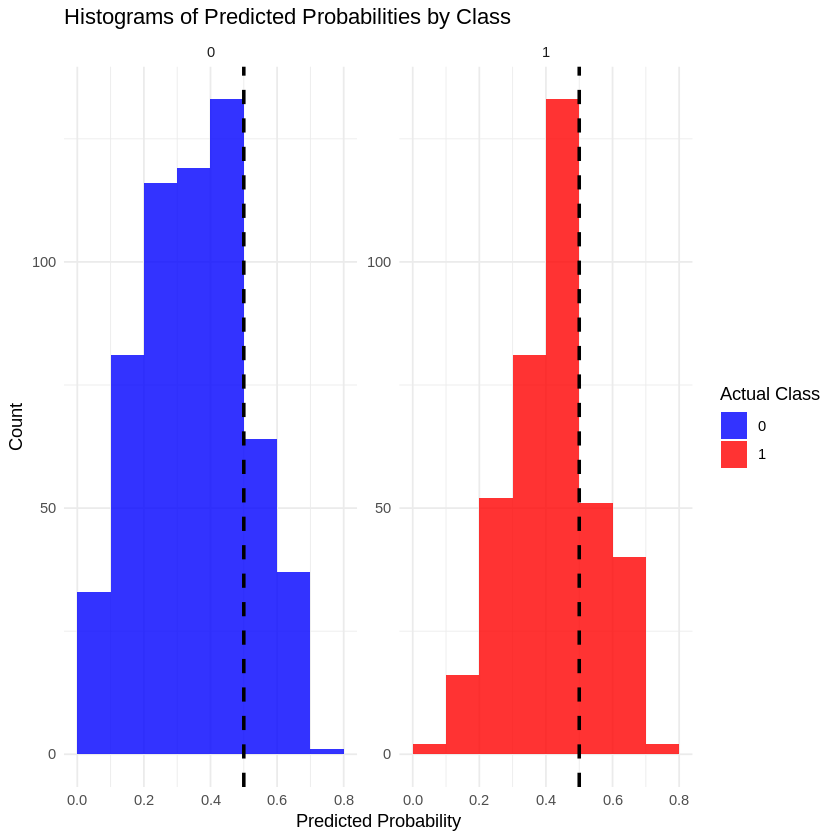

In [53]:
# Histogram of predicted_probs on test_data
results <- data.frame(
  Actual = test_data$private,
  Predicted_Prob = predicted_probs
)

ggplot(results, aes(x = Predicted_Prob)) +
  geom_histogram(binwidth = 0.1, aes(fill = as.factor(Actual)), alpha = 0.8, boundary = 0) +
  geom_vline(xintercept = 0.5, linetype = "dashed", color = "black", size = 1) +
  facet_wrap(~Actual, scales = "free") +
  scale_fill_manual(values = c("0" = "blue", "1" = "red")) +
  labs(title = "Histograms of Predicted Probabilities by Class",
           x = "Predicted Probability",
           y = "Count",
        fill = "Actual Class") +
  theme_minimal()

In [54]:
# Calibration Plot on predicted_probs on test_data
results$pred_bin <- cut(predicted_probs, breaks = c(0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1), include.lowest=TRUE)

cal_data <- results %>%
  group_by(pred_bin) %>%
  summarize(event_prob = mean(Actual))

cal_data

pred_bin,event_prob
<fct>,<dbl>
"[0,0.1]",0.05714286
"(0.1,0.2]",0.16494845
"(0.2,0.3]",0.30952381
"(0.3,0.4]",0.40500000
"(0.4,0.5]",0.50000000
"(0.5,0.6]",0.44347826
"(0.6,0.7]",0.51948052
"(0.7,0.8]",0.66666667


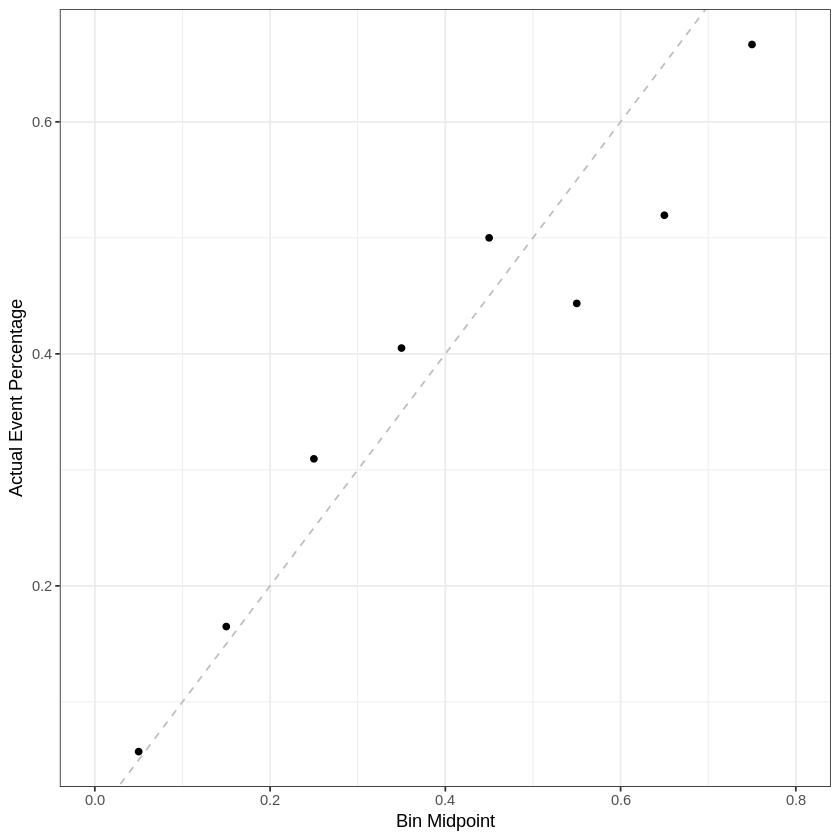

In [55]:
# add bin midpoints for plotting
cal_data$bin_mid <- c(0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75)

# make claibration plot
cal_data %>% ggplot(aes(x = bin_mid, y = event_prob)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, lty = 2, col = "grey") +
  ylab("Actual Event Percentage") +
  xlab("Bin Midpoint") + xlim(0,0.8) +
  theme_bw()

In [56]:
# Computed Cohen's k on test_data
cohen.kappa(cbind(test_data$private, predicted_classes))

Call: cohen.kappa1(x = x, w = w, n.obs = n.obs, alpha = alpha, levels = levels, 
    w.exp = w.exp)

Cohen Kappa and Weighted Kappa correlation coefficients and confidence boundaries 
                 lower estimate upper
unweighted kappa 0.021    0.079  0.14
weighted kappa   0.021    0.079  0.14

 Number of subjects = 961 

The histogram, calibration plot, and computed cohen's k on the test_data collectively suggests that the logistic regression model fit on the training data with a 0.5 threshold is performing poorly.

In the histogram, the 0.5 threshold is marked as a dash line in both graphs. We can see for actual class 0 (blue graph), the majority of the predictions are on the left side of the dash, suggesting the model does do okay when predicting no private insurance, but does very poorly when trying to predict having private insurance as seen in the actual class 1 (red graph). For the samples that do have private insurance, the model has predicted that they didn't have insurnace, as shown by the majority counts are on the left side of the 0.5 threshold line.


For the calibration plot, well-calibrated prediction probabilities would fall along the 45 degree line. But as seen in our graph, the points are above and below the 45 degree line.

Cohen Kappa value for the test_data is 0.079, which is very close to 0. This means there are essentially no agreement between observed and predicted classes.

### (c)
 (12 pts.) Suppose that you want to determine if there is a better threshold than 50%. Construct an
ROC curve and compute the AUC (based on the test/validation data) for the logistic model that you
fit in part (a). What is the optimal threshold if we want the sum of the sensitivity and specificity to
be maximized? Does the optimal threshold produce a good predictive model based on sensitivity and
specificity? Justify your response.

In [57]:
# Generate ROC
logit_roc <- roc(response = results$Actual, predictor = results$Predicted_Prob)
logit_roc

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = results$Actual, predictor = results$Predicted_Prob)

Data: results$Predicted_Prob in 584 controls (results$Actual 0) < 377 cases (results$Actual 1).
Area under the curve: 0.6324

The AUC is 0.6324.

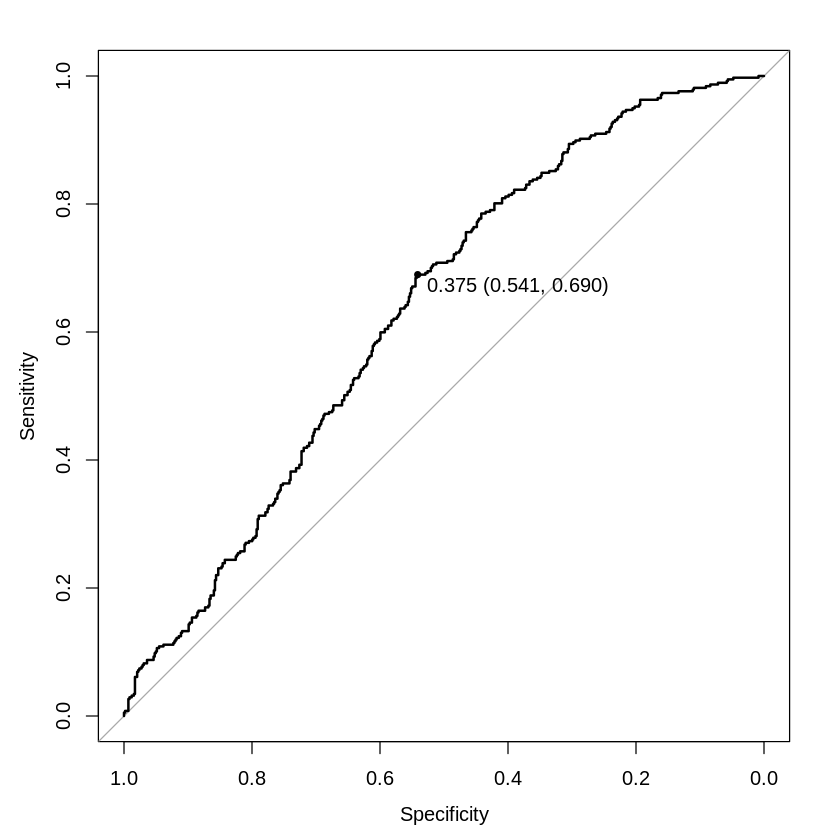

In [58]:
# Plot ROC Curve with optimal threshold point
plot(logit_roc, print.thres = TRUE)

The optimal threshold to maximize the sum of sensitivity and specificity is 0.375.

In [59]:
# Predict probabilities on the test set using the trained model
predicted_probs <- predict(logistic_model, newdata = test_data, type = "response")

# Classify using the optimal threshold found in ROC
predicted_classes <- ifelse(predicted_probs > 0.375, 1, 0)

# Generate confusiong matrix
conf_matrix <- table(Predicted = predicted_classes, Actual = test_data$private)

conf_matrix

         Actual
Predicted   0   1
        0 315 117
        1 269 260

In [60]:
# Cell Values
TP <- conf_matrix[2, 2]  # True Positives
FN <- conf_matrix[1, 2]  # False Negatives
FP <- conf_matrix[2, 1]  # False Positives
TN <- conf_matrix[1, 1]  # True Negatives


# Test correct classification (Accuracy)
accuracy <- (TP + TN) / (TP + TN + FP + FN)
print(paste("Accuracy:", accuracy))

# Test misclassification error (misclassification)
misclassification <- 1 - accuracy
print(paste("Misclassification:", misclassification))

# Test True Positive Rate (TPR)
TPR <- TP / (TP + FN)
print(paste("True Positive Rate (TPR):", TPR))

# Test False Positive Rate (FPR)
FPR <- FP / (FP + TN)
print(paste("False Positive Rate (FPR):", FPR))

[1] "Accuracy: 0.598335067637877"
[1] "Misclassification: 0.401664932362123"
[1] "True Positive Rate (TPR): 0.689655172413793"
[1] "False Positive Rate (FPR): 0.460616438356164"


The change from 0.5 --> 0.375 (optimal) classification threshold did not make a difference in relation to its overall predictive power, with the test misclassification error still being 0.402, the same as the 0.5 threshold. But the components that make up the misclassification error did change, with the number of true positives (predicting having private insurance) increasing and true negative (prediciting not haveing private insurance) decreasing.

There was also a change in the TPR and FPR, both increasing in values respectively, which meant that decreasing the threshold lead to a better TPR at the exchange of a worse FPR.

If our goal was to identify more people with private insurance, this new logistic regression model with a lower threshold does perform better as seen in the increase in True Positives and a higher TPR.

### (d)
(10 pts.) Fit KNN classifiers on the training data set for K = 5, 10, 15, 20, 25, 30, 35, and 40 using all
8 predictors. Use the validation set to select the optimal value of K based on misclassification error.
How does the best-performing KNN model compare the the logistic model from part (a) with respect
to misclassification error?

In [61]:
# Re-load in data
mus14data <- read_csv("/content/mus14data.csv")

# Trim data down to using specific predictors
select_predictors <- c("private", "retire", "age", "hstatusg", "hhincome", "educyear", "married", "hisp", "chronic")
mus14data_selected <- mus14data %>%
  dplyr::select(all_of(select_predictors))

Rows: 3206 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (35): personid, private, eprhi, age, hisp, white, female, educyear, marr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [62]:
# Center and Scale the data
mus14data_selected_csc <- data.frame(scale(mus14data_selected[,2:9]))
mus14data_selected_csc$private <- mus14data_selected$private

# Split data 70% training set, 30% test/validation set (Same split as previous)
set.seed(1234)

train_ids <- sample(1:3206, size = ceiling(3206*0.70))
test_ids <- setdiff(1:3206, train_ids)

train_data_csc <- mus14data_selected_csc[train_ids, ]
test_data_csc <- mus14data_selected_csc[test_ids, ]

# Holds the misclassification errors from the different K
misclassification_error <- numeric(length = 8)
k_values <- c(5, 10, 15, 20, 25, 30, 35, 40)

# Loop through each value of k
for (i in seq_along(k_values)) {
  k <- k_values[i]  # Get the current value of k

  # Fit the KNN model
  knn_pred <- knn(train = train_data_csc[, 1:8],
                  test = test_data_csc[, 1:8],
                  cl = train_data_csc$private,
                  k = k,
                  prob = TRUE)

  # Calculate misclassification error for specific knn_pred model
  misclassification_error[i] <- mean(knn_pred != test_data_csc$private)

  # Print the results
  print(paste0("k = ", k, " - Misclassification Error: ", misclassification_error[i]))
}

[1] "k = 5 - Misclassification Error: 0.406867845993757"
[1] "k = 10 - Misclassification Error: 0.398543184183143"
[1] "k = 15 - Misclassification Error: 0.394380853277836"
[1] "k = 20 - Misclassification Error: 0.406867845993757"
[1] "k = 25 - Misclassification Error: 0.404786680541103"
[1] "k = 30 - Misclassification Error: 0.413111342351717"
[1] "k = 35 - Misclassification Error: 0.40894901144641"
[1] "k = 40 - Misclassification Error: 0.399583766909469"


The best K value based on lowest misclassification error is k=15 with a misclassification error of 0.394. It is essentially on the same level as the logistic classifier model made in (a), where its misclassification error was 0.402, a 0.008 difference.

## Part II (Cross-Validation Approach)

### (e)
(10 pts.) Using the complete data set with all 3206 observations, compute the 10-fold CV misclassification
error for the logistic classifier based on all 8 predictors and using a threshold of 50%. How does this
compare with the estimate for the test misclassification error that you obtained in part (a)? On average,
should we expect this value to be larger or smaller than the misclassification error obtained in part (a)?
Justify your response.

In [63]:
# Reload the data
mus14data <- read_csv("/content/mus14data.csv")

# Trim data down to using specific predictors
select_predictors <- c("private", "retire", "age", "hstatusg", "hhincome", "educyear", "married", "hisp", "chronic")
mus14data_selected <- mus14data %>%
  dplyr::select(all_of(select_predictors))

# Factor the catagorical variables
mus14data_selected$retire <- factor(mus14data_selected$retire)
mus14data_selected$hstatusg <- factor(mus14data_selected$hstatusg)
mus14data_selected$married <- factor(mus14data_selected$married)
mus14data_selected$hisp <- factor(mus14data_selected$hisp)
mus14data_selected$private <- factor(mus14data_selected$private,
                                     levels = c(0, 1),
                                     labels = c("class0", "class1"))

# Confirm data
head(mus14data_selected)

table(mus14data_selected$private)

Rows: 3206 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (35): personid, private, eprhi, age, hisp, white, female, educyear, marr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


private,retire,age,hstatusg,hhincome,educyear,married,hisp,chronic
<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
class0,0,62,0,0,12,0,0,3
class0,0,59,0,0,12,0,0,1
class0,1,60,1,0,13,0,0,2
class0,0,62,0,0,10,0,0,4
class0,0,54,0,0,9,0,0,6
class0,1,62,1,0,12,1,0,0



class0 class1 
  1965   1241 

In [64]:
# 10-fold CV Logistic Classifier, train() default 50% threshold
set.seed(1234)

lr_mus14data_selected_10cv <- suppressWarnings(train(x = mus14data_selected[,2:9], y = mus14data_selected$private,
                                                     method = "glm", family = binomial(link = "logit"),
                                                     trControl = trainControl(method = "cv", number = 10,
                                                     classProbs = TRUE, savePredictions = TRUE)))

# Calculate misclassification error (1 - accuracy)
misclassification_error = 1 - lr_mus14data_selected_10cv$results$Accuracy
print(paste("Misclassification Error:", misclassification_error))

[1] "Misclassification Error: 0.378042982430681"


In [65]:
0.402 - 0.378

[1] 0.024

This 10-fold cv logistic classifier model has a lower test misclassification error of 0.378, a 0.024 difference compared to the validation apporach logistic classifer in (a) of 0.402.

On average, we would expect k-fold CV misclassification error to be smaller than the validation set approach done in (a). This is because the k-fold CV is being trained and tested on different parts of the same dataset. The model would eventaully train on patterns that would be seen in the test set as it goes through the folds, leading to better predictions and lower misclassification.

While validation set approach tests on a completely independent validation set, not seen by the model during training, that may have patterns not present in the training dataset, which will lead to more misclassification.

### (f)
(15 pts.) Using the complete data set with all 3206 observations, determine the optimal threshold for
the logistic model fit in part (e) based on 10-fold CV misclassification error. Consider threshold values
of 10%, 20%, 30%, 40%, 50%, 60%, 70%, 80%, and 90%. Is the optimal threshold based on 10-fold CV
misclassification error the same as the optimal threshold based on 10-fold CV Cohen’s κ? Justify your
response.

In [66]:
# Sequence of threshold values
prob_thresh <- seq(0.10, 0.90, by = 0.10)
prob_thresh

[1] 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9

In [67]:
# use thresholder() function to obtain accuracy measures at each threshold
lr_mus14data_selected_10cv_ths <- thresholder(lr_mus14data_selected_10cv,
                                              threshold = prob_thresh,
                                              final = TRUE,
                                              statistics = c("Sensitivity", "Specificity", "Accuracy", "Kappa"))

# Calculate misclassification error
lr_mus14data_selected_10cv_ths$misclassification_error <- 1 - lr_mus14data_selected_10cv_ths$Accuracy

lr_mus14data_selected_10cv_ths

parameter,prob_threshold,Sensitivity,Specificity,Accuracy,Kappa,misclassification_error
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
none,0.1,0.99898477,0.0008064516,0.6126015,-0.0002557865,0.3873985
none,0.2,0.99796954,0.0040322581,0.6132265,0.0024430841,0.3867735
none,0.3,0.99593650,0.0120838710,0.6150947,0.0097731869,0.3849053
none,0.4,0.95472651,0.0958838710,0.6222714,0.0596776668,0.3777286
none,0.5,0.84073345,0.2755483871,0.6219570,0.1273671169,0.3780430
none,0.6,0.59853672,0.6462580645,0.6169930,0.2328738259,0.3830070
none,0.7,0.36594064,0.8573677419,0.5561537,0.1928644578,0.4438463
none,0.8,0.14912462,0.9734258065,0.4681931,0.0986685503,0.5318069
none,0.9,0.04579923,0.9983870968,0.4145355,0.0346235504,0.5854645


No, the optimal threshold that minimizes the 10-fold CV misclassification error is 0.4 at 0.3777, while the optimal threshold that maximizes kappa is 0.6 at a kappa value of 0.2329. The difference is most likely due to misclassification error focusing on raw predictions, while kappa takes into account classes and random agreement. Kappa might be favoring the higher threshold that handles the class imbalance better.

### (g)  
(10 pts.) Using the complete data set with all 3206 observations, fit KNN classifiers with K = 5, 10,
15, 20, 25, 30, 35, and 40 using all 8 predictors. What is the optimal value of K based on 10-fold CV
misclassification error? Justify your response.

In [68]:
# Reload the data
mus14data <- read_csv("/content/mus14data.csv")

# Trim data down to using specific predictors
select_predictors <- c("private", "retire", "age", "hstatusg", "hhincome", "educyear", "married", "hisp", "chronic")
mus14data_selected <- mus14data %>%
  dplyr::select(all_of(select_predictors))

# Center and Scale the data
mus14data_selected_csc <- data.frame(scale(mus14data_selected[,2:9]))
mus14data_selected_csc$private <- factor(mus14data_selected$private,
                                         levels = c(0, 1),
                                         labels = c("class0", "class1"))

# Dataframe of specific k values for tuneGrid
k_values <- data.frame(k = c(5, 10, 15, 20, 25, 30, 35, 40))

# 10-fold CV KNN classifier
set.seed(1234)

knn_mus14data_selected_10cv <- suppressWarnings(train(x = mus14data_selected_csc[, 1:8],
                                                      y = mus14data_selected_csc$private,
                                                      method = "knn",
                                                      trControl = trainControl(method = "cv",
                                                                               number = 10),
                                                      tuneGrid = k_values))

knn_mus14data_selected_10cv

Rows: 3206 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (35): personid, private, eprhi, age, hisp, white, female, educyear, marr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


k-Nearest Neighbors 

3206 samples
   8 predictor
   2 classes: 'class0', 'class1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2885, 2886, 2884, 2885, 2885, 2886, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.6060448  0.1541163
  10  0.6004422  0.1373768
  15  0.6060497  0.1441581
  20  0.6069823  0.1421461
  25  0.6016854  0.1244215
  30  0.6063797  0.1328576
  35  0.6076248  0.1345077
  40  0.6116669  0.1408423

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 40.

In [69]:
# Calculate the misclassification error (1 - Accuracy)
knn_mus14data_selected_10cv_df <- as.data.frame(knn_mus14data_selected_10cv$results)
knn_mus14data_selected_10cv_df$misclassification_error = 1 - knn_mus14data_selected_10cv_df$Accuracy
knn_mus14data_selected_10cv_df

,k,Accuracy,Kappa,AccuracySD,KappaSD,misclassification_error
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,0.6060448,0.1541163,0.02134927,0.04805439,0.3939552
2,10,0.6004422,0.1373768,0.03151431,0.07019562,0.3995578
3,15,0.6060497,0.1441581,0.01873625,0.04080273,0.3939503
4,20,0.6069823,0.1421461,0.02645300,0.05755657,0.3930177
5,25,0.6016854,0.1244215,0.02682351,0.06027985,0.3983146
6,30,0.6063797,0.1328576,0.02943817,0.06023496,0.3936203
7,35,0.6076248,0.1345077,0.02611759,0.05760120,0.3923752
8,40,0.6116669,0.1408423,0.01613993,0.03639981,0.3883331


The optimal k based on misclassification error from the results table is k=40, where it has the smallest misclassification error of 0.388.

### (h)
 (10 pts.) Using the complete data set with all 3206 observations, fit LDA and QDA classifiers using all
8 predictors. Compute the 10-fold CV misclassification error for each classifier. For these data, why
might one argue that that LDA and QDA methods are inappropriate?

In [70]:
# 10-fold CV LDA classifier
set.seed(1234)

lda_mus14data_selected_10cv <- suppressWarnings(train(x = mus14data_selected_csc[, 1:8],
                                                      y = mus14data_selected_csc$private,
                                                      method = "lda",
                                                      trControl = trainControl(method = "cv",
                                                                               number = 10)))

lda_mus14data_selected_10cv

Linear Discriminant Analysis 

3206 samples
   8 predictor
   2 classes: 'class0', 'class1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2885, 2886, 2884, 2885, 2885, 2886, ... 
Resampling results:

  Accuracy   Kappa    
  0.6207138  0.1210944


In [71]:
# 10-fold CV QDA classifier
set.seed(1234)

qda_mus14data_selected_10cv <- suppressWarnings(train(x = mus14data_selected_csc[, 1:8],
                                                      y = mus14data_selected_csc$private,
                                                      method = "qda",
                                                      trControl = trainControl(method = "cv",
                                                                               number = 10)))

qda_mus14data_selected_10cv

Quadratic Discriminant Analysis 

3206 samples
   8 predictor
   2 classes: 'class0', 'class1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2885, 2886, 2884, 2885, 2885, 2886, ... 
Resampling results:

  Accuracy   Kappa   
  0.6010759  0.221991


In [72]:
# Misclassification Error Results
lda_misclassification = 1 - lda_mus14data_selected_10cv$results$Accuracy
qda_misclassification = 1 - qda_mus14data_selected_10cv$results$Accuracy

print(paste("The lda_misclassification error is: ", lda_misclassification))
print(paste("The qda_misclassification error is: ", qda_misclassification))

[1] "The lda_misclassification error is:  0.379286185929065"
[1] "The qda_misclassification error is:  0.398924078723322"


LDA and QDA methods may be inappropriate for this dataset due to there being a lot of catagorical variables, since LDA and QDA handles normally distributed variables better. As seen in the KNN modeling, a k=40 performed the best, this suggests the data points may not be clearly separated, thus needing more neighbors to classify. LDA and QDA would struggle more due to its simplicity and inflexibility compared to other modeling methods.

### (i)
(5 pts.) Using the complete data set with all 3206 observations, fit a naive Bayes classifier (using
all 8 predictors). Assume that the numerical variables are normally distributed. Use method
= "naive_bayes" and tuneGrid = data.frame(laplace = 0, usekernel = FALSE, adjust =
FALSE) in the train() function. Also, if you have not already, be sure to convert the binary 0/1
predictors to factor variables, otherwise these predictors will be treated as numerical and therefore will be assumed to be normally distributed. Compute the 10-fold CV misclassification error for this
classifier.

In [73]:
# Reload the data
mus14data <- read_csv("/content/mus14data.csv")

# Trim data down to using specific predictors
select_predictors <- c("private", "retire", "age", "hstatusg", "hhincome", "educyear", "married", "hisp", "chronic")
mus14data_selected <- mus14data %>%
  dplyr::select(all_of(select_predictors))

# Factor the catagorical variables
mus14data_selected$retire <- factor(mus14data_selected$retire)
mus14data_selected$hstatusg <- factor(mus14data_selected$hstatusg)
mus14data_selected$married <- factor(mus14data_selected$married)
mus14data_selected$hisp <- factor(mus14data_selected$hisp)
mus14data_selected$private <- factor(mus14data_selected$private)

# Set up the Naive Bayes tuning parameters
nb_tunegrid <- data.frame(laplace = 0, usekernel = FALSE, adjust = FALSE)

# Set seed for reproducibility
set.seed(1234)

# Train Naive Bayes model using 10-fold cross-validation
nb_mus14data_selected_10cv <- suppressWarnings(train(x = mus14data_selected[, 1:8],
                                                     y = mus14data_selected$private,
                                                     method = "naive_bayes",
                                                     trControl = trainControl(method = "cv", number = 10),
                                                     tuneGrid = nb_tunegrid))

nb_mus14data_selected_10cv

Rows: 3206 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (35): personid, private, eprhi, age, hisp, white, female, educyear, marr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Naive Bayes 

3206 samples
   8 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2885, 2886, 2884, 2885, 2885, 2886, ... 
Resampling results:

  Accuracy   Kappa    
  0.9984404  0.9967171

Tuning parameter 'laplace' was held constant at a value of 0
Tuning
 parameter 'usekernel' was held constant at a value of FALSE
Tuning
 parameter 'adjust' was held constant at a value of FALSE

In [74]:
# Misclassification Error Results
bayes_misclassification = 1 - nb_mus14data_selected_10cv$results$Accuracy

print(paste("The bayes misclassification error is: ", bayes_misclassification))

[1] "The bayes misclassification error is:  0.00155957943925233"


### (j)
(2 pts.) Considering all of the classifiers from parts (e) - (h), which is best with respect to 10-fold CV
misclassification error?

In [75]:
# (e) Logistic Regression 10-CV
print(paste("Logistic Classifier 10-CV misclassification error is: ", 1 - lr_mus14data_selected_10cv$results$Accuracy))
print(paste("Logistic Classifier @ 0.4 threshold 10-CV misclassification error is: ", 1 - lr_mus14data_selected_10cv_ths[lr_mus14data_selected_10cv_ths$prob_threshold == 0.4, ]$Accuracy))
print(paste("KNN Classifer @ k=40 10-CV misclassification error is: ", 1 - knn_mus14data_selected_10cv$results$Accuracy[8]))
print(paste("LDA Classifier 10-CV misclassification error is: ", 1 - lda_mus14data_selected_10cv$results$Accuracy))
print(paste("QDA Classifier 10-CV misclassification error is: ", 1 - qda_mus14data_selected_10cv$results$Accuracy))

[1] "Logistic Classifier 10-CV misclassification error is:  0.378042982430681"
[1] "Logistic Classifier @ 0.4 threshold 10-CV misclassification error is:  0.377728553530311"
[1] "KNN Classifer @ k=40 10-CV misclassification error is:  0.388333109605077"
[1] "LDA Classifier 10-CV misclassification error is:  0.379286185929065"
[1] "QDA Classifier 10-CV misclassification error is:  0.398924078723322"


The 10-fold CV model with the lowest misclassification error is Logistic Classifier @ 0.4 threshold 10-CV at a misclassification error value of 0.3777.